###Importing the libraries

In [ ]:
#data manipulation libraries
import numpy as np
import random

#data visualization library
import matplotlib.pyplot as plt

#model building libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input,Conv2D, MaxPooling2D, Dense, Flatten, AveragePooling2D, BatchNormalization, Reshape


###Importing the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing training and testing data
x_train = np.loadtxt('/content/drive/MyDrive/Tensorflow models/CNN/input.csv', delimiter = ',')
x_test = np.loadtxt('/content/drive/MyDrive/Tensorflow models/CNN/input_test.csv', delimiter = ',')


In [ ]:
#importing training and test label
y_train = np.loadtxt('/content/drive/MyDrive/Tensorflow models/CNN/labels.csv', delimiter = ',')
y_test = np.loadtxt('/content/drive/MyDrive/Tensorflow models/CNN/labels_test.csv', delimiter = ',')


###Checking the shape of the dataset

In [ ]:
#checking the shape of the dataset
print('shape of x_train :', x_train.shape)
print('shape of x_test :', x_test.shape)
print('shape of y_train :', y_train.shape)
print('shape of y_test :', y_train.shape)

shape of x_train : (2000, 30000)
shape of x_test : (400, 30000)
shape of y_train : (2000,)
shape of y_test : (2000,)


- There are 2000 images in the training set. 
- Each samle is a flattened array of 30000 values.
- The test set has 400 images.

###Reshaping the dataset into an appropriate shape

In [ ]:
#reshaping the train and test images
x_train = x_train.reshape(len(x_train), 100,100, 3)
x_test = x_test.reshape(len(x_test), 100,100, 3)

In [ ]:
#reshaping the labels
y_train = y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test), 1)

**Checking the shape of the dataset again**

In [ ]:
#checking the shape of the dataset
print('shape of x_train :', x_train.shape)
print('shape of x_test :', x_test.shape)
print('shape of y_train :', y_train.shape)
print('shape of y_test :', y_train.shape)

shape of x_train : (2000, 100, 100, 3)
shape of x_test : (400, 100, 100, 3)
shape of y_train : (2000, 1)
shape of y_test : (2000, 1)


- The shape has been fixed

###Rescaling the dataset

In [ ]:
#checking the scale 
x_train[1:15]

array([[[[131., 128., 135.],
         [160., 157., 164.],
         [198., 192., 204.],
         ...,
         [250., 249., 247.],
         [255., 255., 253.],
         [250., 249., 245.]],

        [[140., 137., 144.],
         [127., 124., 131.],
         [120., 114., 124.],
         ...,
         [251., 253., 252.],
         [254., 255., 253.],
         [254., 255., 251.]],

        [[204., 202., 207.],
         [187., 185., 190.],
         [147., 142., 148.],
         ...,
         [249., 255., 255.],
         [238., 247., 242.],
         [232., 241., 236.]],

        ...,

        [[174., 182., 195.],
         [172., 180., 193.],
         [178., 186., 197.],
         ...,
         [ 87., 114.,  97.],
         [ 75.,  99.,  83.],
         [ 80., 105.,  86.]],

        [[166., 173., 189.],
         [164., 172., 185.],
         [172., 180., 193.],
         ...,
         [ 78., 106.,  84.],
         [ 72.,  97.,  76.],
         [ 77., 102.,  81.]],

        [[173., 180., 196.],
       

- The images are ranging from 1 to 255, they should range from 0 to 1

In [ ]:
#rescaling the dataset
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
#checking the scale 
x_train[1:15]

array([[[[0.51372549, 0.50196078, 0.52941176],
         [0.62745098, 0.61568627, 0.64313725],
         [0.77647059, 0.75294118, 0.8       ],
         ...,
         [0.98039216, 0.97647059, 0.96862745],
         [1.        , 1.        , 0.99215686],
         [0.98039216, 0.97647059, 0.96078431]],

        [[0.54901961, 0.5372549 , 0.56470588],
         [0.49803922, 0.48627451, 0.51372549],
         [0.47058824, 0.44705882, 0.48627451],
         ...,
         [0.98431373, 0.99215686, 0.98823529],
         [0.99607843, 1.        , 0.99215686],
         [0.99607843, 1.        , 0.98431373]],

        [[0.8       , 0.79215686, 0.81176471],
         [0.73333333, 0.7254902 , 0.74509804],
         [0.57647059, 0.55686275, 0.58039216],
         ...,
         [0.97647059, 1.        , 1.        ],
         [0.93333333, 0.96862745, 0.94901961],
         [0.90980392, 0.94509804, 0.9254902 ]],

        ...,

        [[0.68235294, 0.71372549, 0.76470588],
         [0.6745098 , 0.70588235, 0.75686275]

- The scale of the images has changed

###Displaying one image

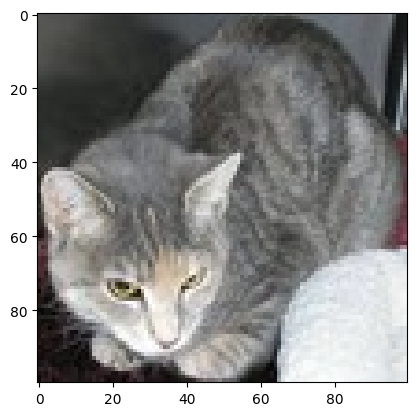

In [ ]:
#dispalying any random image
randomimage = random.randint(0, len(x_train))
#plotting the image
plt.imshow(x_train[randomimage, :])
plt.show()

- As shown, a cat is displayed

##MODEL BUILDING

###Sequencial model

In [ ]:
sq_model = Sequential([
    Conv2D(32, 3,3, activation = 'relu', input_shape = (100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32, 3,3, activation = 'relu'),
    MaxPooling2D((2,2)),


    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

**Compiling the model**

In [ ]:
#compiling the model
sq_model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'] )

In [ ]:
#fitting the model
sq_model.fit(x_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
63/63 [==============================] - 11s 7ms/step - loss: 0.6921 - accuracy: 0.5165
Epoch 2/10
63/63 [==============================] - 0s 5ms/step - loss: 0.6887 - accuracy: 0.5470
Epoch 3/10
63/63 [==============================] - 0s 5ms/step - loss: 0.6768 - accuracy: 0.5785
Epoch 4/10
63/63 [==============================] - 0s 5ms/step - loss: 0.6657 - accuracy: 0.5870
Epoch 5/10
63/63 [==============================] - 0s 5ms/step - loss: 0.6555 - accuracy: 0.6080
Epoch 6/10
63/63 [==============================] - 0s 5ms/step - loss: 0.6303 - accuracy: 0.6505
Epoch 7/10
63/63 [==============================] - 0s 5ms/step - loss: 0.6173 - accuracy: 0.6725
Epoch 8/10
63/63 [==============================] - 0s 5ms/step - loss: 0.6173 - accuracy: 0.6550
Epoch 9/10
63/63 [==============================] - 0s 5ms/step - loss: 0.5800 - accuracy: 0.6970
Epoch 10/10
63/63 [==============================] - 0s 5ms/step - loss: 0.5410 - accuracy: 0.7275


In [ ]:
sq_model.evaluate(x_test,y_test)

13/13 [==============================] - 0s 6ms/step - loss: 0.6155 - accuracy: 0.6675


[0.6154559850692749, 0.6675000190734863]

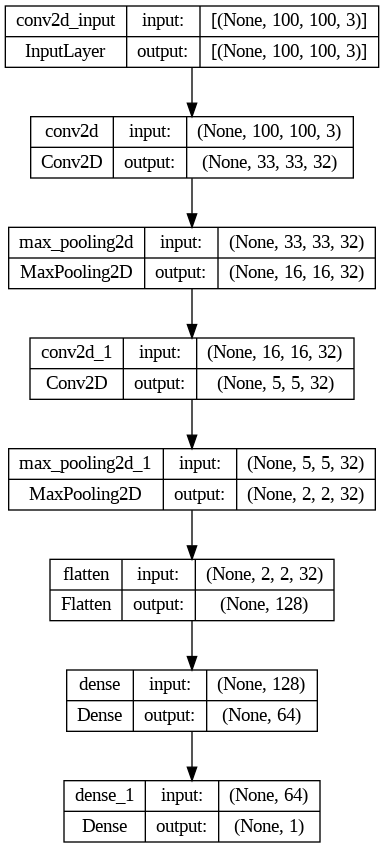

In [ ]:
keras.utils.plot_model(sq_model, 'model.png', show_shapes = True) 

###Functional API model

In [ ]:
#creating the functional API model

input_layer = Input(shape=(100, 100, 3))
conv_layer1 = Conv2D(32, (3, 3), activation='relu')(input_layer)
pooling_layer1 = MaxPooling2D((2, 2))(conv_layer1)
conv_layer2 = Conv2D(32, (3, 3), activation='relu')(pooling_layer1)
pooling_layer2 = MaxPooling2D((2, 2))(conv_layer2)
flatten_layer = Flatten()(pooling_layer2)
dense_layer1 = Dense(64, activation='relu')(flatten_layer)
output_layer = Dense(1, activation='sigmoid')(dense_layer1)

model = Model(inputs=input_layer, outputs=output_layer)

In [ ]:
#compiling the model
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'] )



In [ ]:
#fitting the model
model.fit(x_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
63/63 [==============================] - 3s 12ms/step - loss: 0.7080 - accuracy: 0.4915
Epoch 2/10
63/63 [==============================] - 1s 9ms/step - loss: 0.6774 - accuracy: 0.5695
Epoch 3/10
63/63 [==============================] - 1s 9ms/step - loss: 0.6261 - accuracy: 0.6540
Epoch 4/10
63/63 [==============================] - 1s 9ms/step - loss: 0.5446 - accuracy: 0.7070
Epoch 5/10
63/63 [==============================] - 1s 9ms/step - loss: 0.4703 - accuracy: 0.7695
Epoch 6/10
63/63 [==============================] - 1s 9ms/step - loss: 0.3663 - accuracy: 0.8490
Epoch 7/10
63/63 [==============================] - 1s 9ms/step - loss: 0.2694 - accuracy: 0.8895
Epoch 8/10
63/63 [==============================] - 1s 9ms/step - loss: 0.1782 - accuracy: 0.9375
Epoch 9/10
63/63 [==============================] - 1s 9ms/step - loss: 0.1043 - accuracy: 0.9650
Epoch 10/10
63/63 [==============================] - 1s 9ms/step - loss: 0.0564 - accuracy: 0.9855


In [ ]:
#testing the model on test set
model.evaluate(x_test,y_test)

13/13 [==============================] - 0s 8ms/step - loss: 1.3009 - accuracy: 0.6325


[1.3009175062179565, 0.6324999928474426]

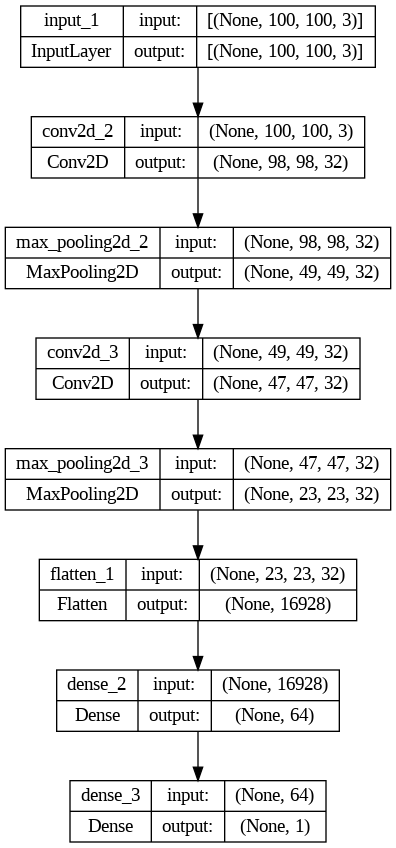

In [ ]:
keras.utils.plot_model(model, 'model.png',show_shapes = True)